In [1]:
import pandas as pd
from linearmodels.panel import PanelOLS, RandomEffects
from linearmodels.panel import compare
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def plot_country_graph(data):
    # Agrupando os dados por país e data, e somando os novos casos
    data_grouped = data.groupby(['Country', 'Date_reported'])['New_deaths'].sum().reset_index()
        
    # Ordenando os dados por país e data
    data_grouped_sorted = data_grouped.sort_values(by=['Country', 'Date_reported'])
    
    # Gerando as cores para cada país
    colors = plt.cm.jet(np.linspace(0, 1, len(data_grouped_sorted['Country'].unique())))
    
    # Plotando o gráfico
    plt.figure(figsize=(15, 10))
    
    for (country, color) in zip(data_grouped_sorted['Country'].unique(), colors):
        country_data = data_grouped_sorted[data_grouped_sorted['Country'] == country]
        plt.plot(country_data['Date_reported'], country_data['New_deaths'], color=color, linewidth=2)
    
    plt.xlabel('Data')
    plt.ylabel('Novos Casos')
    plt.title('Contaminação por COVID-19 ao longo do tempo por país')
    
    plt.show()

In [3]:
data = pd.read_csv('./Full_Sourthern_Countries.csv', encoding="utf-8")
# ==== Teste com Reuino Unido e Espanha ============================
# data = data[data['Country'].isin(['The United Kingdom', 'Spain'])]

# ============ Remoção da Namibia por ser um outlier gigantesco ===========
data = data[data['Country'] != 'Nauru']
data = data[data['Country'] != 'Tuvalu']


data['New_deaths'] = pd.to_numeric(data['New_deaths'], errors='coerce')

# ===== Usando somente dados positivos =============
# data = data[data['New_deaths'] > 0]

data['Date_reported'] = pd.to_datetime(data['Date_reported'])
data = data.set_index(['Country_code', 'Date_reported'])


# ========== Tratando os dados =================================
data['Population'] = data['Population'].str.replace(',', '', regex=False)
data['Population'] = pd.to_numeric(data['Population'], errors='coerce')


# ================= Fazendo a média móvel ==================
data['New_deaths'] = data['New_deaths'].rolling(window=7).mean()

# ================ Fazendo a coluna New_deaths ser relativa a população do país ============
data['Relative_New_deaths'] =  data['New_deaths'] / data['Population']
data['New_deaths']   = data['Relative_New_deaths']


# =========== Tratando os dados da coluna "Physicians per thousand" =========================
# data['Physicians per thousand'] = pd.to_numeric(data['Physicians per thousand'], errors='coerce')
data.rename(columns={'Physicians per thousand': 'Physicians_per_thousand'}, inplace=True)

# ========== Zerando valores negativos na coluna 'New_deaths' ===================
# data.loc[data['New_deaths'] < 0, 'New_deaths'] = 0
# data_no_zeros  = data[data['New_deaths'] > 0]
# New_deaths = data_no_zeros['New_deaths'].mean()
# data['New_deaths'] = data['New_deaths'].replace(0, New_deaths)



# ============= Aplicando a normalização min-max à colunas desejadas =================
scaler = MinMaxScaler()
data['New_deaths'] = scaler.fit_transform(data[['New_deaths']])
# data['Population'] = scaler.fit_transform(data[['Population']])
# data['Urban_population'] = scaler.fit_transform(data[['Urban_population']])


data

Country WHO_region  New_cases  Cumulative_cases  \
Country_code Date_reported                                                     
AO           2020-01-03       Angola       AFRO          0                 0   
             2020-01-04       Angola       AFRO          0                 0   
             2020-01-05       Angola       AFRO          0                 0   
             2020-01-06       Angola       AFRO          0                 0   
             2020-01-07       Angola       AFRO          0                 0   
...                              ...        ...        ...               ...   
ZW           2023-09-23     Zimbabwe       AFRO          0            265748   
             2023-09-24     Zimbabwe       AFRO          0            265748   
             2023-09-25     Zimbabwe       AFRO          0            265748   
             2023-09-26     Zimbabwe       AFRO          0            265748   
             2023-09-27     Zimbabwe       AFRO          0            265748   

                            New_deaths  Cumulative_deaths  season  \
Country_code Date_reported                                          
AO           2020-01-03            NaN                  0  summer   
             2020-01-04            NaN                  0  summer   
             2020-01-05            NaN                  0  summer   
             2020-01-06            NaN                  0  summer   
             2020-01-07            NaN                  0  summer   
...                                ...                ...     ...   
ZW           2023-09-23       0.223729               5718  spring   
             2023-09-24       0.223729               5718  spring   
             2023-09-25       0.223729               5718  spring   
             2023-09-26       0.223729               5718  spring   
             2023-09-27       0.223729               5718  spring   

                           Abbreviation  Population Urban_population  \
Country_code Date_reported                                             
AO           2020-01-03              AO    31825295       21,061,025   
             2020-01-04              AO    31825295       21,061,025   
             2020-01-05              AO    31825295       21,061,025   
             2020-01-06              AO    31825295       21,061,025   
             2020-01-07              AO    31825295       21,061,025   
...                                 ...         ...              ...   
ZW           2023-09-23              ZW    14645468        4,717,305   
             2023-09-24              ZW    14645468        4,717,305   
             2023-09-25              ZW    14645468        4,717,305   
             2023-09-26              ZW    14645468        4,717,305   
             2023-09-27              ZW    14645468        4,717,305   

                            Physicians_per_thousand  Relative_New_deaths  
Country_code Date_reported                                                
AO           2020-01-03                        0.21                  NaN  
             2020-01-04                        0.21                  NaN  
             2020-01-05                        0.21                  NaN  
             2020-01-06                        0.21                  NaN  
             2020-01-07                        0.21                  NaN  
...                                             ...                  ...  
ZW           2023-09-23                        0.21                  0.0  
             2023-09-24                        0.21                  0.0  
             2023-09-25                        0.21                  0.0  
             2023-09-26                        0.21                  0.0  
             2023-09-27                        0.21                  0.0  

[49104 rows x 12 columns]

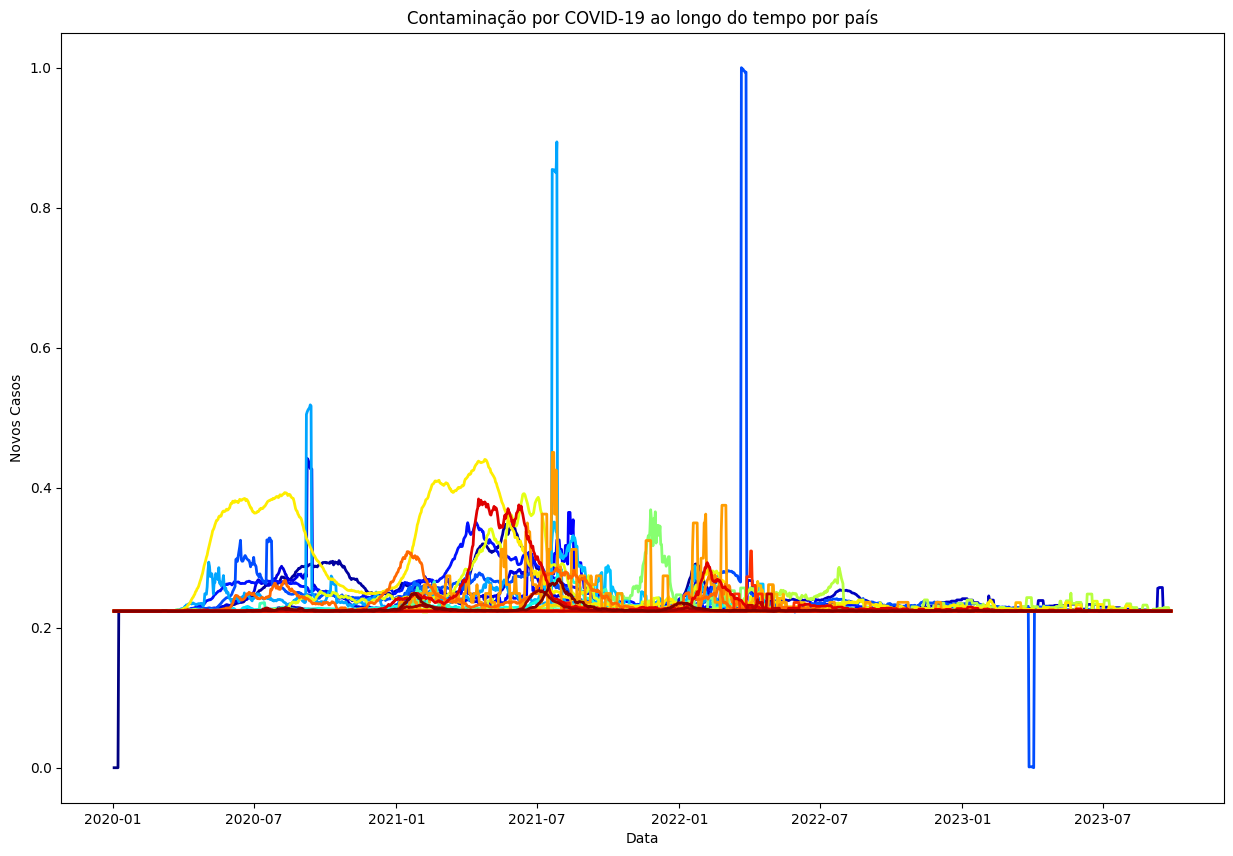

Maior valor na Coluna New_deaths:                            Country WHO_region  New_cases  Cumulative_cases  \
Country_code Date_reported                                                   
CL           2022-03-22      Chile       AMRO       8167           3401145   

                            New_deaths  Cumulative_deaths  season  \
Country_code Date_reported                                          
CL           2022-03-22            1.0              55965  autumn   

                           Abbreviation  Population Urban_population  \
Country_code Date_reported                                             
CL           2022-03-22              CL    18952038       16,610,135   

                            Physicians_per_thousand  Relative_New_deaths  
Country_code Date_reported                                                
CL           2022-03-22                        2.59              0.00009  
Segundo maior valor na Coluna New_deaths:                            Country WHO_

In [4]:
plot_country_graph(data)

# Mariores valores
higher_value = data['New_deaths'].max()
higher_value_row = data[data["New_deaths"] == higher_value]
print("Maior valor na Coluna New_deaths:", higher_value_row)

second_higher_value = data['New_deaths'].nlargest(2).iloc[-1]
second_higher_value_row = data[data["New_deaths"] == second_higher_value]
print("Segundo maior valor na Coluna New_deaths:", second_higher_value_row)

third_higher_value = data['New_deaths'].nlargest(3).iloc[-1]
third_higher_value_row = data[data["New_deaths"] == third_higher_value]
print("Terceiro maior valor na Coluna New_deaths:", third_higher_value_row)


# Menores valores:
index_lowest_value = data['New_deaths'].idxmin()

# Acessando a linha usando o índice encontrado
lowest_value_tow = data.loc[index_lowest_value]
print("Menor valor na Coluna New_deaths:", lowest_value_tow)


In [5]:
# Histograma dos New_deaths
data['New_deaths'].hist(bins=200)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

In [6]:
# BoxPlot dos novos casos separado por países
plt.figure(figsize=(15, 8))  # Ajuste o tamanho conforme necessário
sns.boxplot(x='Country_code', y='New_deaths', data=data)
plt.xticks(rotation=90)  # Rótulos rotacionados para melhor visualização
plt.show()

In [7]:
# Visualizar a concentração de dados zeros
print(data['New_deaths'].value_counts())

New_deaths
0.223729    23966
0.223775      199
0.224701      179
0.224254      171
0.223796      162
            ...  
0.233171        1
0.232880        1
0.232498        1
0.232206        1
0.225778        1
Name: count, Length: 7599, dtype: int64


In [8]:
# Visualizar a distruibuição de amostras por estação
data['season'].value_counts()

season
winter    13536
autumn    13248
summer    12528
spring     9792
Name: count, dtype: int64

In [9]:
# Transformando dados em formato de painel
panel_data = data

# Convertendo 'season' em variáveis dummy
panel_data['season'] = panel_data['season'].astype('category')
dummies = pd.get_dummies(panel_data['season'])

# Agora, junta as variáveis dummy de volta ao DataFrame
panel_data = pd.concat([panel_data, dummies], axis=1)

# Criando dataframe auxliar com variáveis dummy
aux = panel_data[['New_deaths', 'autumn', 'spring', 'summer']].copy()
aux['spring'] = aux['spring'].astype(int)
aux['autumn'] = aux['autumn'].astype(int)
aux['summer'] = aux['summer'].astype(int)
# aux['winter'] = aux['winter'].astype(int)


aux


New_deaths  autumn  spring  summer
Country_code Date_reported                                    
AO           2020-01-03            NaN       0       0       1
             2020-01-04            NaN       0       0       1
             2020-01-05            NaN       0       0       1
             2020-01-06            NaN       0       0       1
             2020-01-07            NaN       0       0       1
...                                ...     ...     ...     ...
ZW           2023-09-23       0.223729       0       1       0
             2023-09-24       0.223729       0       1       0
             2023-09-25       0.223729       0       1       0
             2023-09-26       0.223729       0       1       0
             2023-09-27       0.223729       0       1       0

[49104 rows x 4 columns]

In [10]:
# # Modelo de Efeitos Fixos
# fe_model = PanelOLS.from_formula('New_deaths ~ 1 + Population + Urban_population + Physicians_per_thousand + EntityEffects', aux, check_rank=False)
fe_model = PanelOLS.from_formula('New_deaths ~ 1 + autumn + summer + spring + EntityEffects', aux)
fe_results = fe_model.fit()
print(fe_results)

# # Modelo de Efeitos Aleatórios
# re_model = RandomEffects.from_formula('New_deaths ~ 1 +  autumn + summer + spring + EntityEffects', data=aux)
# re_results = re_model.fit()
# print(re_results)


                          PanelOLS Estimation Summary                           
Dep. Variable:             New_deaths   R-squared:                        0.0058
Estimator:                   PanelOLS   R-squared (Between):          -1.239e-05
No. Observations:               49098   R-squared (Within):               0.0058
Date:                Wed, Nov 29 2023   R-squared (Overall):              0.0050
Time:                        17:35:42   Log-likelihood                 1.196e+05
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      95.892
Entities:                          36   P-value                           0.0000
Avg Obs:                       1363.8   Distribution:                 F(3,49059)
Min Obs:                       1358.0                                           
Max Obs:                       1364.0   F-statistic (robust):             95.892
                            

c:\Users\Gedor\AppData\Local\Programs\Python\Python312\Lib\site-packages\linearmodels\panel\model.py:1214: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


In [579]:
# Teste de Hausman, para decidir entre efeitos fixos e efeitos aleatórios
from scipy import stats

psi = fe_results.cov.iloc[1:,1:] - re_results.cov.iloc[1:,1:]
diff = fe_results.params[1:] - re_results.params[1:]
W = -diff.dot(np.linalg.inv(-psi)).dot(-diff)
dof = re_results.params.size - 1
pvalue = stats.chi2(dof).sf(W)
print("Hausman Test: chisq = {0}, df = {1}, p-value = {2}".format(W, dof, pvalue))

Hausman Test: chisq = -1.827000901490152, df = 3, p-value = 1.0


In [ ]:
# Agrupamento de dados, caso necessário
# Selecting the specified columns
selected_columns = ['Date_reported', 'Country_code', 'Country', 'WHO_region', 'New_deaths',
                    'Cumulative_cases', 'New_deaths', 'Cumulative_deaths', 'season', 
                    'Abbreviation', 'Population', 'Urban_population', 'Physicians per thousand']

# Grouping the data
grouped_data_selected_columns = data[selected_columns].set_index('Date_reported').groupby(['Country', 'Country_code']).resample('W').agg({
    'New_deaths': 'sum',
    'Cumulative_cases': 'sum',
    'New_deaths': 'sum',
    'Cumulative_deaths': 'sum',
    'WHO_region': 'last',
    'season': 'last',
    'Abbreviation': 'last',
    'Population': 'last',
    'Urban_population': 'last',
    'Physicians per thousand': 'last'
}).reset_index()